<a href="https://colab.research.google.com/github/arunreddyvallapureddy/Regression-ai1-fall2019/blob/master/lab_linreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Multiple Ways

## Making the data

We'll first construct a synthetic data set..using a function from the `scikit-learn` library. Synthetic data is nice in the sense that we can constrain how the noise behaves, and thus isolate effects.

In [0]:
%matplotlib inline
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#code adapted from http://tillbergmann.com/blog/python-gradient-descent.html
X, y, coef = make_regression(n_samples = 100, 
                       n_features=1, 
                       noise=20,
                       random_state=2017,
                       coef=True)

Notice that the X is in the canonical array-of-arrays format.
**Try and print its shape**

In [46]:
X.shape

(100, 1)

We are fitting a model with an intercept. Lets see what it is.

In [47]:
coef

array(80.88336208)

We can plot the data.

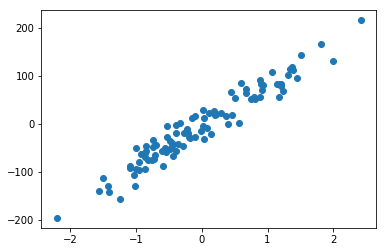

In [48]:
plt.plot(X,y, 'o');

For the purposes of drawing the regression line, lets create a uniform grid of points, and then reshape it into the canonical format

In [0]:
xgrid = np.linspace(-2.5,2.5,1000) #divides line into 1000 points
Xgrid = xgrid.reshape(-1,1) #gives size of the array

In [50]:
Xgrid.shape, xgrid.shape

((1000, 1), (1000,))

## Fit using sklearn

In [0]:
from sklearn.linear_model import LinearRegression

In [52]:
lr = LinearRegression()
lr.fit(X,y)
ypgrid = lr.predict(Xgrid)
lr.coef_, lr.intercept_

(array([82.90456142]), -3.709228868670302)

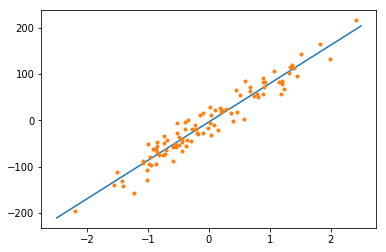

In [53]:
plt.plot(Xgrid, ypgrid)
plt.plot(X, y, '.')

In [0]:
from sklearn.metrics import r2_score

In [55]:
r2_score(y, lr.predict(X))

0.9342344891672815

In [56]:
lr.score(X,y)

0.9342344891672816

## The impact of sample size

We'll sample 20 points from the data set. We do this by sampling 20 indices, index into X and y, and then fit on the sample

In [57]:
sample_indices = np.random.choice(range(100), size=20)
sample_indices

array([64,  1, 12, 14, 12, 62, 23, 89, 57, 40, 21, 14, 20, 37, 37, 40, 37,
       30, 77, 10])

In [0]:
Xsample = X[sample_indices]
ysample = y[sample_indices]

In [0]:
lr_s = LinearRegression().fit(Xsample, ysample)
r2_score(ysample, lr_s.predict(Xsample)), lr_s.score(Xsample, ysample)

Lets check the sensitivity of our prediction to our sample. We'll do this 1000 times

(0.7, 1)

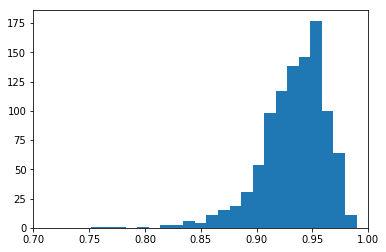

In [66]:
scores = []
for i in range(1000):
    sample_indices = np.random.choice(range(100), size=20)
    Xsample = X[sample_indices]
    ysample = y[sample_indices]
    scores.append(LinearRegression().fit(Xsample, ysample).score(Xsample, ysample))
plt.hist(scores,  bins=np.linspace(0.7, 1, 30))
plt.xlim(0.7,1)

Redo this with a higher amount of noise (about 400). For this you will need to create a new dataset. Plot the data. Plot the histogram of the R^2 as well as that of the coefficients.Try a smaller dataset as well. What conclusions can you draw?

In [0]:
# your code here
X1, y1, coef = make_regression(n_samples = 100, 
                       n_features=1, 
                       noise=400,
                       random_state=2017,
                       coef=True)


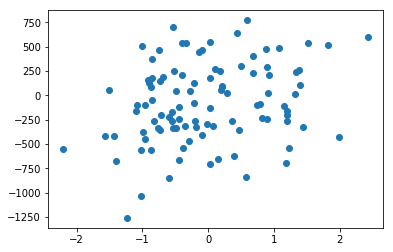

In [62]:
# your code here
plt.plot(X1,y1, 'o');

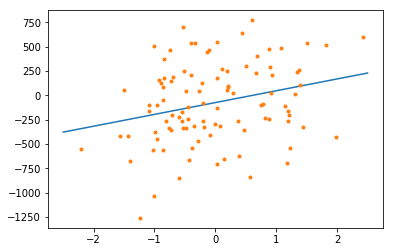

In [68]:
# your code here
lr1 = LinearRegression()
lr1.fit(X1,y1)
ypgrid = lr1.predict(Xgrid)
plt.plot(Xgrid, ypgrid)
plt.plot(X1, y1, '.')



(0, 1)

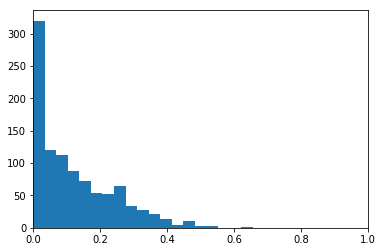

In [69]:
sample_indices = np.random.choice(range(100), size=20)
Xsample = X1[sample_indices]
ysample = y1[sample_indices]
lr_s = LinearRegression().fit(Xsample, ysample)
r2_score(ysample, lr_s.predict(Xsample)), lr_s.score(Xsample, ysample)
scores = []
for i in range(1000):
    sample_indices = np.random.choice(range(100), size=20)
    Xsample = X1[sample_indices]
    ysample = y1[sample_indices]
    scores.append(LinearRegression().fit(Xsample, ysample).score(Xsample, ysample))
plt.hist(scores,  bins=np.linspace(0, 1, 30))
plt.xlim(0,1)

In [73]:
for i in range(5):
    sample_indices = np.random.choice(range(20), size=20, replace=True)
    print(sample_indices)

[ 9 11 12 18  7  3 14  9 13 18 14 16  5 12  2  2  7  0  1  4]
[11 10 18 18  2 18  3  7 19 10  5 11  2 18 15  2  2  1 18  7]
[13 16 19 17 13 14 14 14 13 11  4  4  0 19  0 11 10  2  9 14]
[15 19 11  2 14 18  8  2  0  3  5 14 17 10  8 14 12 16 14  4]
[12  3 11 14  7 12 11  0 11 16 16  7 12  4 13  1  9  8 13 15]


(0.7, 1)

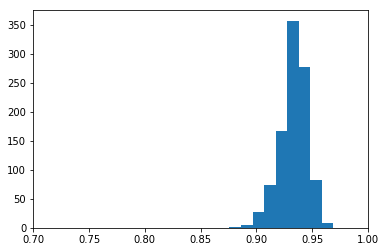

In [76]:
# code here for BOOTSTRAP, resample with replacement and size=100 (size of original sample)
scores = []
slopes = []
intercepts = []

for i in range(1000):
    sample_indices = np.random.choice(range(100), size=100, replace=True)
    Xsample = X[sample_indices]
    ysample = y[sample_indices]
    scores.append(LinearRegression().fit(Xsample, ysample).score(Xsample, ysample))
    
plt.hist(scores,  bins=np.linspace(0.7, 1, 30))
plt.xlim(0.7,1)

In [0]:
bla = lambda x: 5*x+4


NameError: ignored

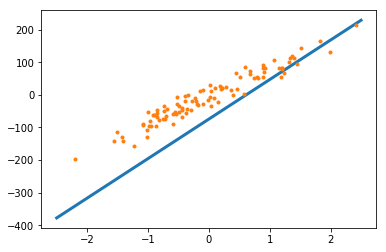

In [78]:
# your code here
plt.plot(Xgrid, ypgrid, lw=3)
plt.plot(X, y, '.')
for i in range(1000):
  line = lambda x: slopes[i]*x + intercepts[i]
  plt.plot(xgrid, line(xgrid), alpha = 0.01)


## Testing and training

A grid like the one we created might contain some of the points we fit this model on. This is called **Data Contamination** and is a big no-no. If we want an independent estimate of the error, we should hold out some points in a test set.

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=2017)

Now lets fit the model on the training set and evaluate it both on the training set and the test set. We print the R^2

In [0]:
lr2 = LinearRegression().fit(Xtrain, ytrain)
r2_test = r2_score(ytest, lr.predict(Xtest))
r2_train = r2_score(ytrain, lr.predict(Xtrain))

In [0]:
"Train R2 is {}, while test R^2 is {}".format(r2_train, r2_test)

## Using Keras to fit the model

We'll use plain and simple gradient descent (why?) and Keras's Sequential API

In [0]:
from keras.models import Sequential
from keras.layers import Dense
lr3 = Sequential()
lr3.add(Dense(1, input_shape=(1,)))
lr3.compile(optimizer='sgd', loss='mean_squared_error',  metrics=['mae','accuracy'])
lr3.summary()

In [0]:
history = lr3.fit(Xtrain, ytrain, epochs=400, batch_size=80)

In [0]:
plt.plot(history.history['loss'])

In [0]:
lr3.get_weights()

### Using the Keras Functional API



In [0]:
from keras.layers import Input, Dense
from keras.models import Model

inputs_placeholder = Input(shape=(1,))
outputs_placeholder = Dense(1, activation='linear')(inputs_placeholder)

m = Model(inputs=inputs_placeholder, outputs=outputs_placeholder)
m.compile(optimizer='sgd', loss='mean_squared_error',  metrics=['mae','accuracy'])
m.summary()

In [0]:
history2 = m.fit(Xtrain, ytrain, epochs=250, batch_size=80)

In [0]:
m.get_weights()